

Epoch 1, Loss: 0.1481, Train Accuracy: 95.48, Test Accuracy: 95.27
Epoch 2, Loss: 0.1206, Train Accuracy: 96.07, Test Accuracy: 95.58
Epoch 3, Loss: 0.0788, Train Accuracy: 97.48, Test Accuracy: 96.54
Epoch 4, Loss: 0.0914, Train Accuracy: 97.02, Test Accuracy: 95.77
Epoch 5, Loss: 0.0664, Train Accuracy: 97.91, Test Accuracy: 96.80
Epoch 6, Loss: 0.0650, Train Accuracy: 97.87, Test Accuracy: 96.79
Epoch 7, Loss: 0.0677, Train Accuracy: 97.76, Test Accuracy: 96.40
Epoch 8, Loss: 0.0773, Train Accuracy: 97.49, Test Accuracy: 96.16
Epoch 9, Loss: 0.0548, Train Accuracy: 98.21, Test Accuracy: 96.81
Epoch 10, Loss: 0.0654, Train Accuracy: 97.85, Test Accuracy: 96.19
Epoch 11, Loss: 0.0409, Train Accuracy: 98.57, Test Accuracy: 97.00
Epoch 12, Loss: 0.0381, Train Accuracy: 98.72, Test Accuracy: 96.99
Epoch 13, Loss: 0.0335, Train Accuracy: 98.89, Test Accuracy: 97.00
Epoch 14, Loss: 0.0241, Train Accuracy: 99.19, Test Accuracy: 97.18
Epoch 15, Loss: 0.0293, Train Accuracy: 98.98, Test Acc

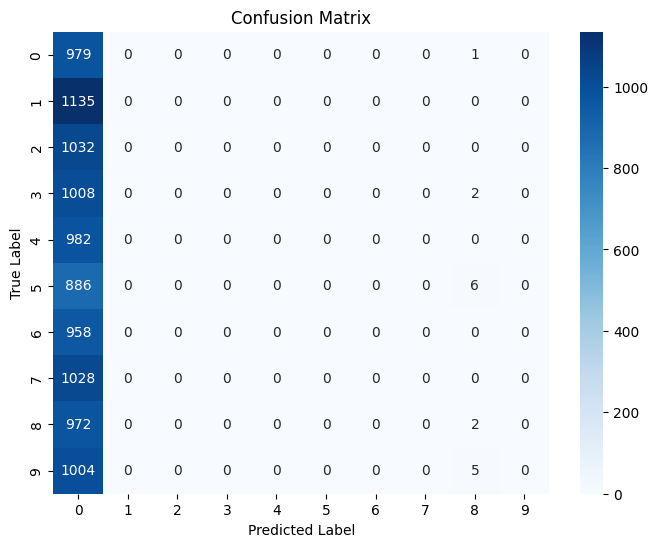

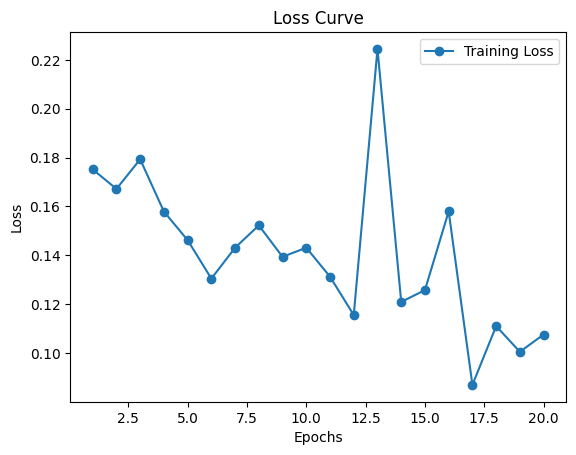

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.python.framework.ops import disable_eager_execution
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

disable_eager_execution()  # Disable eager execution for graph execution

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0

# Define model hyperparameters
input_size = 784
hidden1_size = 128
hidden2_size = 64
output_size = 10
learning_rate = 0.01
batch_size = 100
epochs = 20

# Define placeholders for input and output
X = tf.compat.v1.placeholder(tf.float32, [None, input_size])
y = tf.compat.v1.placeholder(tf.int32, [None])  # Labels remain as integers

# Initialize weights and biases
weights = {
    'w1': tf.Variable(tf.random.truncated_normal([input_size, hidden1_size], stddev=0.1)),
    'w2': tf.Variable(tf.random.truncated_normal([hidden1_size, hidden2_size], stddev=0.1)),
    'w3': tf.Variable(tf.random.truncated_normal([hidden2_size, output_size], stddev=0.1))
}

biases = {
    'b1': tf.Variable(tf.zeros([hidden1_size])),
    'b2': tf.Variable(tf.zeros([hidden2_size])),
    'b3': tf.Variable(tf.zeros([output_size]))
}

# Define feed-forward neural network
def neural_network(X):
    layer1 = tf.nn.sigmoid(tf.matmul(X, weights['w1']) + biases['b1'])
    layer2 = tf.nn.sigmoid(tf.matmul(layer1, weights['w2']) + biases['b2'])
    output_layer = tf.matmul(layer2, weights['w3']) + biases['b3']
    return output_layer

# Compute logits
logits = neural_network(X)

# Define loss function (sparse categorical cross-entropy)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits))

# Define optimizer
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# Define accuracy metric
correct_pred = tf.equal(tf.argmax(logits, 1), tf.cast(y, tf.int64))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Run session
tf.compat.v1.disable_eager_execution()
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    
    # Training loop
    for epoch in range(epochs):
        for i in range(0, len(x_train), batch_size):
            batch_x, batch_y = x_train[i:i+batch_size], y_train[i:i+batch_size]
            sess.run(optimizer, feed_dict={X: batch_x, y: batch_y})
        
        # Calculate and display loss and accuracy at each epoch
        train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: x_train, y: y_train})
        test_acc = sess.run(accuracy, feed_dict={X: x_test, y: y_test})
        print(f"Epoch {epoch+1}, Loss: {train_loss:.4f}, Train Accuracy: {train_acc*100:.2f}, Test Accuracy: {test_acc*100:.2f}")
    
    # Compute final train and test accuracy
    final_train_acc = sess.run(accuracy, feed_dict={X: x_train, y: y_train})
    final_test_acc = sess.run(accuracy, feed_dict={X: x_test, y: y_test})
    print(f"Final Train Accuracy: {final_train_acc*100:.2f}")
    print(f"Final Test Accuracy: {final_test_acc*100:.2f}")
    
    print("Training Complete!")


#confusion matrix
y_pred = tf.argmax(logits, 1)
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    y_pred_test = sess.run(y_pred, feed_dict={X: x_test})
    
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


#loss curve

epochs_list = range(1, 21)
train_loss_list = []  # Store loss values per epoch

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for epoch in epochs_list:
        for i in range(0, len(x_train), batch_size):
            batch_x, batch_y = x_train[i:i+batch_size], y_train[i:i+batch_size]
            _, loss_val = sess.run([optimizer, loss], feed_dict={X: batch_x, y: batch_y})
        train_loss_list.append(loss_val)

plt.plot(epochs_list, train_loss_list, marker='o', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()